In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import scipy
import os
import sys
from sklearn.utils import resample

## Read the data

In [207]:
data = pd.read_csv('train.csv')

In [208]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
#Number of unique ticket ids
len(data['Ticket'].unique())

681

In [212]:
#Ticket ids for which port of embarkation has Nan values
b = list(data['Embarked'].isnull())
null_Embarked = []
for i in range(len(b)):
    if b[i] == True:
        null_Embarked.append(data['Ticket'].iloc[i])
null_Embarked

['113572', '113572']

In [213]:
data[data['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
a = list(data['Ticket'].unique())
family = []
no_family = []
for ticket in a:
    if ticket not in null_Embarked:
        families = data[data['Ticket'] == ticket]
        if len(families) > 1:
            if len(families['Embarked'].unique()) == 1:
                family.append(ticket)
            else:
                no_family.append(ticket)

In [215]:
print('Number of ticket ids shared by more than one passenger with same port of embarkation :', len(family))
print('Number of ticket ids shared by more than one passenger with different port of embarkation :', len(no_family))

Number of ticket ids shared by more than one passenger with same port of embarkation : 131
Number of ticket ids shared by more than one passenger with different port of embarkation : 2


## Number of Unique values in categorical features

In [216]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
data = data[columns]

In [217]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [219]:
#The target variable is not highly imbalanced
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [220]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [221]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [223]:
# Number of unique cabin ids
len(data['Cabin'].value_counts())

147

In [17]:
b = list(data['Cabin'].unique())
survived = {}
no_people = {}
for cabin in b:
    members = data[data['Cabin'] == cabin]
    no_people[cabin] = len(members)
    survived[cabin] = len(members[members['Survived'] == 1])

In [224]:
#Number of people in each cabin
no_people

{nan: 0,
 'C85': 1,
 'C123': 2,
 'E46': 1,
 'G6': 4,
 'C103': 1,
 'D56': 1,
 'A6': 1,
 'C23 C25 C27': 4,
 'B78': 1,
 'D33': 2,
 'B30': 1,
 'C52': 2,
 'B28': 2,
 'C83': 2,
 'F33': 3,
 'F G73': 2,
 'E31': 1,
 'A5': 1,
 'D10 D12': 1,
 'D26': 2,
 'C110': 1,
 'B58 B60': 2,
 'E101': 3,
 'F E69': 1,
 'D47': 1,
 'B86': 1,
 'F2': 3,
 'C2': 2,
 'E33': 2,
 'B19': 1,
 'A7': 1,
 'C49': 1,
 'F4': 2,
 'A32': 1,
 'B4': 1,
 'B80': 1,
 'A31': 1,
 'D36': 2,
 'D15': 1,
 'C93': 2,
 'C78': 2,
 'D35': 2,
 'C87': 1,
 'B77': 2,
 'E67': 2,
 'B94': 1,
 'C125': 2,
 'C99': 1,
 'C118': 1,
 'D7': 1,
 'A19': 1,
 'B49': 2,
 'D': 3,
 'C22 C26': 3,
 'C106': 1,
 'C65': 2,
 'E36': 1,
 'C54': 1,
 'B57 B59 B63 B66': 2,
 'C7': 1,
 'E34': 1,
 'C32': 1,
 'B18': 2,
 'C124': 2,
 'C91': 1,
 'E40': 1,
 'T': 1,
 'C128': 1,
 'D37': 1,
 'B35': 2,
 'E50': 1,
 'C82': 1,
 'B96 B98': 4,
 'E10': 1,
 'E44': 2,
 'A34': 1,
 'C104': 1,
 'C111': 1,
 'C92': 2,
 'E38': 1,
 'D21': 1,
 'E12': 1,
 'E63': 1,
 'A14': 1,
 'B37': 1,
 'C30': 1,
 'D20': 

In [225]:
#Number of people who have survived in each cabin
survived

{nan: 0,
 'C85': 1,
 'C123': 1,
 'E46': 0,
 'G6': 2,
 'C103': 1,
 'D56': 1,
 'A6': 1,
 'C23 C25 C27': 2,
 'B78': 1,
 'D33': 2,
 'B30': 0,
 'C52': 2,
 'B28': 2,
 'C83': 1,
 'F33': 3,
 'F G73': 0,
 'E31': 0,
 'A5': 0,
 'D10 D12': 1,
 'D26': 0,
 'C110': 0,
 'B58 B60': 1,
 'E101': 3,
 'F E69': 1,
 'D47': 1,
 'B86': 0,
 'F2': 2,
 'C2': 1,
 'E33': 2,
 'B19': 0,
 'A7': 0,
 'C49': 0,
 'F4': 2,
 'A32': 0,
 'B4': 1,
 'B80': 1,
 'A31': 1,
 'D36': 2,
 'D15': 1,
 'C93': 2,
 'C78': 1,
 'D35': 2,
 'C87': 0,
 'B77': 2,
 'E67': 1,
 'B94': 0,
 'C125': 2,
 'C99': 1,
 'C118': 0,
 'D7': 1,
 'A19': 0,
 'B49': 2,
 'D': 2,
 'C22 C26': 1,
 'C106': 1,
 'C65': 1,
 'E36': 1,
 'C54': 1,
 'B57 B59 B63 B66': 2,
 'C7': 1,
 'E34': 1,
 'C32': 1,
 'B18': 2,
 'C124': 0,
 'C91': 0,
 'E40': 1,
 'T': 0,
 'C128': 0,
 'D37': 1,
 'B35': 2,
 'E50': 1,
 'C82': 0,
 'B96 B98': 4,
 'E10': 1,
 'E44': 1,
 'A34': 1,
 'C104': 1,
 'C111': 0,
 'C92': 2,
 'E38': 0,
 'D21': 1,
 'E12': 1,
 'E63': 0,
 'A14': 0,
 'B37': 0,
 'C30': 0,
 'D20': 

## Exploratory Data Analysis

In [227]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


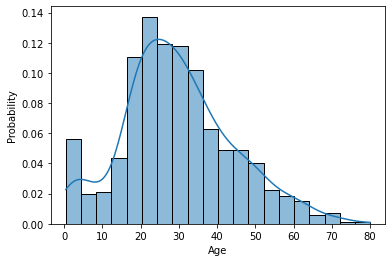

In [72]:
#Histogram of age
sns.histplot(data = data, x = 'Age', kde = True, stat = 'probability')
plt.savefig('a.png')

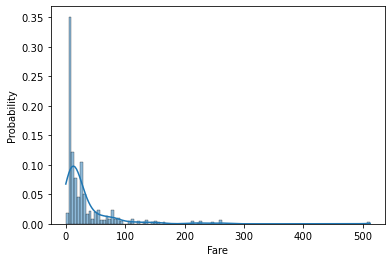

In [73]:
#Histogram of fare
sns.histplot(data = data, x = 'Fare', kde = True, stat = 'probability')
plt.savefig('a.png')

In [228]:
#Number of passengers in each class travelling with zero fares
data[data['Fare'] == 0]['Pclass'].value_counts() 

2    6
1    5
3    4
Name: Pclass, dtype: int64

## Average ticket fares in each passenger class

In [229]:
#Passenger class 1
np.mean(data[data['Pclass'] == 1]['Fare'])

84.15468749999992

In [230]:
#Passenger class 2
np.mean(data[data['Pclass'] == 2]['Fare'])

20.66218315217391

In [231]:
#Passenger class 3
np.mean(data[data['Pclass'] == 3]['Fare'])

13.675550101832997

All the 3rd class ticket fares are <70. For fares >70, 100/105 passengers belong to the first class. 15 passengers have travelled with zero fares. This shows that the features Fare and Passenger class are highly correlated

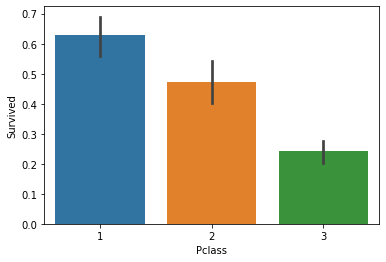

In [232]:
#Barplot between survival rate and passenger class
sns.barplot(x = "Pclass", y = 'Survived', data = data)
plt.savefig('a.png')

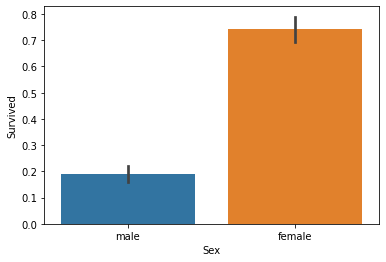

In [233]:
#Barplot between survival rate and sex
sns.barplot(x = "Sex", y = 'Survived', data = data)
plt.savefig('a.png')

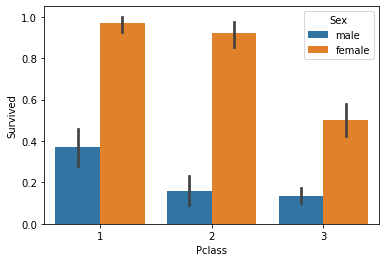

In [234]:
#Barplot between survival rate and passenger class conditioned on gender
sns.barplot(x = "Pclass", y = 'Survived', hue = 'Sex', data = data)
plt.savefig('a.png')

## Discretization of age

In [235]:
age_1 = data[data['Age'] >= 48] #greater than 48
age_2 = data[data['Age'] <= 15] # less than 15
temp = data[data['Age'] > 15]
age_3 = temp[temp['Age'] < 48] # between 15 and 48

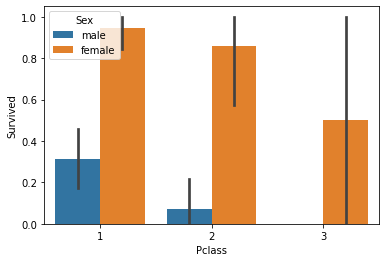

In [239]:
#greater than 48
sns.barplot(x = "Pclass", y = 'Survived', hue = 'Sex', data = age_1)
plt.savefig('a.png')

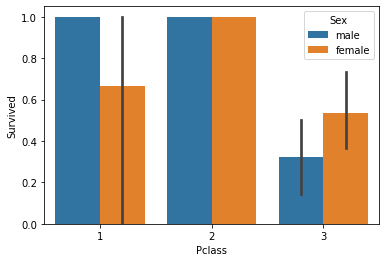

In [240]:
# less than 15
sns.barplot(x = "Pclass", y = 'Survived', hue = 'Sex', data = age_2)
plt.savefig('a.png')

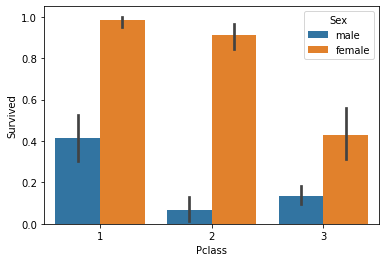

In [241]:
# between 15 and 48
sns.barplot(x = "Pclass", y = 'Survived', hue = 'Sex', data = age_3)
plt.savefig('a.png')

## Data preparation

In [293]:
df = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

<AxesSubplot:xlabel='Age', ylabel='Probability'>

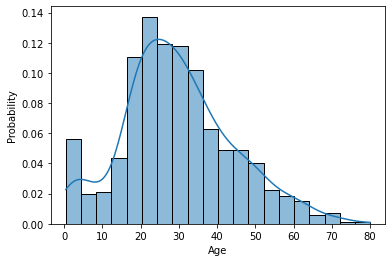

In [294]:
sns.histplot(data = df, x = 'Age', kde = True, stat = 'probability')

<AxesSubplot:xlabel='Age', ylabel='Probability'>

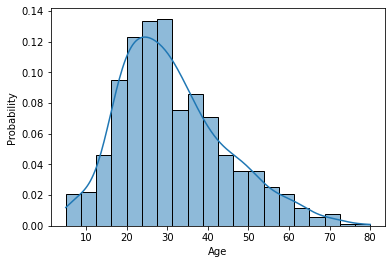

In [295]:
#After removing outliers
sns.histplot(data = df[df['Age'] >= 5], x = 'Age', kde = True, stat = 'probability')

C:\Users\Vishal rishi M K\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


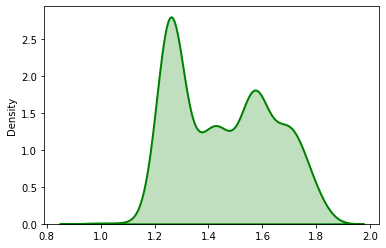

In [296]:
#Box-cox transformation of Fare
sns.distplot(scipy.stats.boxcox(df[df['Fare']>0]['Fare'])[0], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")
plt.savefig('a.png')

In [297]:
df_1 = df.dropna(subset = ['Age'])
df_1 = df_1[df_1['Age'] >= 5] #remove outliers

In [298]:
df_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.390208,2.218101,31.327893,0.442136,0.375371,34.830149
std,0.488159,0.845352,13.268181,0.834119,0.837486,53.962957
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,29.000000,0.000000,0.000000,14.456250
75%,1.000000,3.000000,39.000000,1.000000,0.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [299]:
df_1['Sex'] = df_1["Sex"].apply(lambda x: 1 if x == 'male' else 0)

In [300]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df_1.iloc[:, 1:4]
y = df_1.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, random_state = 42)

In [301]:
# mean_age = np.mean(X_train['Age'])
# std_age = np.std(X_train['Age'])
# X_train['Age'] = X_train['Age'].apply(lambda x: (x - mean_age)/std_age)
# X_test['Age'] = X_test['Age'].apply(lambda x: (x - mean_age)/std_age)

In [302]:
#Logistic regression model 2
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [303]:
scores = cross_val_score(log, X_train, y_train, scoring = 'f1', cv = 10)

In [304]:
print('Cross validation scores :', scores)
print('Mean F1 score :', scores.mean())
print('Standard deviation', scores.std())

Cross validation scores : [0.65116279 0.77272727 0.58536585 0.72340426 0.63636364 0.73170732
 0.8        0.7804878  0.76923077 0.74418605]
Mean F1 score : 0.7194635746459885
Standard deviation 0.06771506633446006


In [305]:
log.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [306]:
y_pred_train = log.predict(X_train)
y_pred_test = log.predict(X_test)

In [307]:
#Train set
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
print('Confusion matrix :', confusion_matrix(y_train, y_pred_train))
print('Precision :', precision_score(y_train, y_pred_train))
print('Recall :', recall_score(y_train, y_pred_train))
print('F1 score :', f1_score(y_train, y_pred_train))
print('ROC AUC :', roc_auc_score(y_train, y_pred_train))

Confusion matrix : [[308  44]
 [ 69 153]]
Precision : 0.7766497461928934
Recall : 0.6891891891891891
F1 score : 0.7303102625298329
ROC AUC : 0.7820945945945945


In [308]:
#Test set
print('Confusion matrix :', confusion_matrix(y_test, y_pred_test))
print('Precision :', precision_score(y_test, y_pred_test))
print('Recall :', recall_score(y_test, y_pred_test))
print('F1 score :', f1_score(y_test, y_pred_test))
print('ROC AUC :', roc_auc_score(y_test, y_pred_test))

Confusion matrix : [[48 11]
 [ 8 33]]
Precision : 0.75
Recall : 0.8048780487804879
F1 score : 0.7764705882352942
ROC AUC : 0.8092186854071931


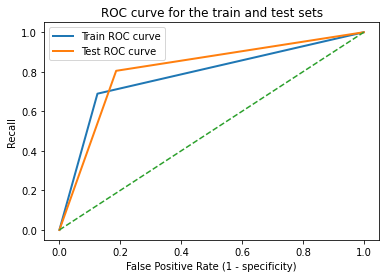

In [309]:
ft,tt,t1=roc_curve(y_train,y_pred_train)
fte,tte,t2=roc_curve(y_test,y_pred_test)
plt.plot(ft,tt,linewidth=2,label='Train ROC curve')
plt.plot(fte,tte,linewidth=2,label='Test ROC curve')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('Recall')
plt.title('ROC curve for the train and test sets')
plt.legend()
plt.savefig('a.png')

## Feature transforms

In [264]:
df_2 = df.dropna(subset = ['Age'])
df_2['Sex'] = df_2["Sex"].apply(lambda x: 1 if x == 'male' else 0)

C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [265]:
df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [266]:
def transform(x):
    if x <= 15:
        return 1
    elif x < 30:
        return 2
    elif x < 48:
        return 3
    else:
        return 4

In [267]:
df_2['Age'].apply(transform).value_counts() #Discretizing age 

2    301
3    241
4     89
1     83
Name: Age, dtype: int64

In [268]:
df_2['Age'] = df_2['Age'].apply(transform)

C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df_2.iloc[:, 1:4]
y = df_2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, random_state = 42)

In [270]:
#Logistic regression model 3
log = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.5)

In [271]:
scores = cross_val_score(log, X_train, y_train, scoring = 'f1', cv = 10)

In [272]:
print('Cross validation scores :', scores)
print('Mean F1 score :', scores.mean())
print('Standard deviation', scores.std())

Cross validation scores : [0.74418605 0.75       0.68       0.71111111 0.63829787 0.79166667
 0.7755102  0.82608696 0.76       0.63636364]
Mean F1 score : 0.7313222493596839
Standard deviation 0.06051798004285127


In [273]:
log.fit(X_train, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [274]:
y_pred_train = log.predict(X_train)
y_pred_test = log.predict(X_test)

In [276]:
#Train set
print('Confusion matrix :', confusion_matrix(y_train, y_pred_train))
print('Precision :', precision_score(y_train, y_pred_train))
print('Recall :', recall_score(y_train, y_pred_train))
print('F1 score :', f1_score(y_train, y_pred_train))
print('ROC AUC :', roc_auc_score(y_train, y_pred_train))

Confusion matrix : [[317  47]
 [ 76 174]]
Precision : 0.7873303167420814
Recall : 0.696
F1 score : 0.7388535031847133
ROC AUC : 0.7834395604395604


In [277]:
#Test set
print('Confusion matrix :', confusion_matrix(y_test, y_pred_test))
print('Precision :', precision_score(y_test, y_pred_test))
print('Recall :', recall_score(y_test, y_pred_test))
print('F1 score :', f1_score(y_test, y_pred_test))
print('ROC AUC :', roc_auc_score(y_test, y_pred_test))

Confusion matrix : [[44 16]
 [15 25]]
Precision : 0.6097560975609756
Recall : 0.625
F1 score : 0.6172839506172839
ROC AUC : 0.6791666666666668


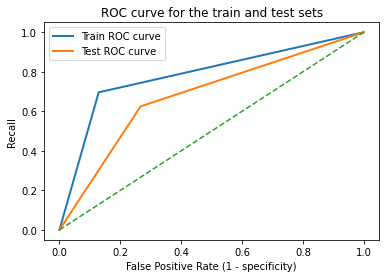

In [275]:
ft,tt,t1=roc_curve(y_train,y_pred_train)
fte,tte,t2=roc_curve(y_test,y_pred_test)
plt.plot(ft,tt,linewidth=2,label='Train ROC curve')
plt.plot(fte,tte,linewidth=2,label='Test ROC curve')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('Recall')
plt.title('ROC curve for the train and test sets')
plt.legend()
plt.savefig('a.png')

## Feature importance :

In [278]:
from sklearn.inspection import permutation_importance

In [282]:
# Perform feature importance analysis using sklearn's permutation importance
# Display the important features 
result_train=permutation_importance(log,X_train,y_train,random_state=0,n_jobs=-1, scoring = 'f1', n_repeats = 10)
features_train=[]
for i in result_train.importances_mean.argsort()[::-1][:10]:
    features_train.append(X_train.columns[i])
    print(f"{X.columns[i]:<8}"
          f"{result_train.importances_mean[i]:.3f}"
          f" +/- {result_train.importances_std[i]:.3f}")

Sex     0.350 +/- 0.014
Pclass  0.027 +/- 0.008
Age     0.008 +/- 0.008


In [283]:
# Perform feature importance analysis using sklearn's permutation importance
# Display the important features 
result_test=permutation_importance(log,X_test,y_test,random_state=0,n_jobs=-1, scoring = 'f1', n_repeats = 10)
features_test=[]
for i in result_test.importances_mean.argsort()[::-1][:10]:
    features_test.append(X_test.columns[i])
    print(f"{X.columns[i]:<8}"
          f"{result_test.importances_mean[i]:.3f}"
          f" +/- {result_test.importances_std[i]:.3f}")

Sex     0.223 +/- 0.033
Pclass  0.040 +/- 0.027
Age     0.002 +/- 0.017


In [284]:
# Calculate the relative importance of the features
rel_importance_train = sorted(result_train.importances_mean/max(result_train.importances_mean),reverse=True)
rel_importance_test = sorted(result_test.importances_mean/max(result_test.importances_mean),reverse=True)

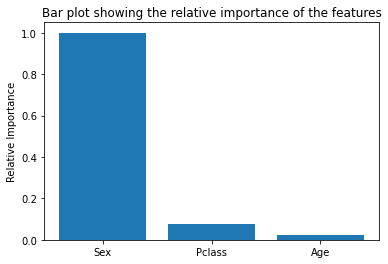

In [285]:
# Bar plot showing the relative importance of the top ten features
plt.bar(features_train,rel_importance_train[:10])
plt.ylabel('Relative Importance')
plt.title('Bar plot showing the relative importance of the features')
plt.savefig('a.png')

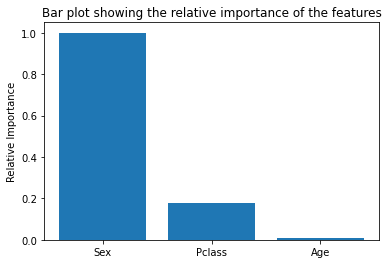

In [286]:
# Bar plot showing the relative importance of the top ten features
plt.bar(features_test,rel_importance_test[:10])
plt.ylabel('Relative Importance')
plt.title('Bar plot showing the relative importance of the features')
plt.savefig('a.png')

## Bootstrap aggregating

In [287]:
from scipy.stats import sem, t
from scipy import mean

def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()
    
def create_log():
    log = LogisticRegression(penalty = 'l1', solver = 'liblinear')
    return log

# Function to compute the confidence intervals
def confidence_interval(data,confidence=0.95):
    n=len(data)
    m=np.mean(data)
    std_err=sem(data)
    h=std_err*t.ppf((1+confidence)/2,n-1)
    start = m - h
    end = m + h
    return (start, end)

def observe(arr,ppr,band):
    new_arr=[]
    for i in range(len(ppr)):
        if (ppr[i] < band[0]) or (ppr[i] > band[1]):
            new_arr.append(arr[i])
    return new_arr

In [165]:
# Create the bootstrap aggregating model with 2000 bootstraps
bootstrap = 2000
delay_probability=[]
for boot in range(bootstrap):
    X_boot,y_boot=resample(X_train,y_train,random_state=42)
    log=create_log()
    log.fit(X_boot,y_boot)
    delay_probability.append(log.predict_proba(X_test)[:,-1])
    progressbar(boot,bootstrap)

 [==================================================] 2000/2000 Done...



In [166]:
histogram=[]
for i in range(100):
    a=[]
    for j in range(bootstrap):
        a.append(delay_probability[j][i])
    histogram.append(a)

In [167]:
len(histogram)

100

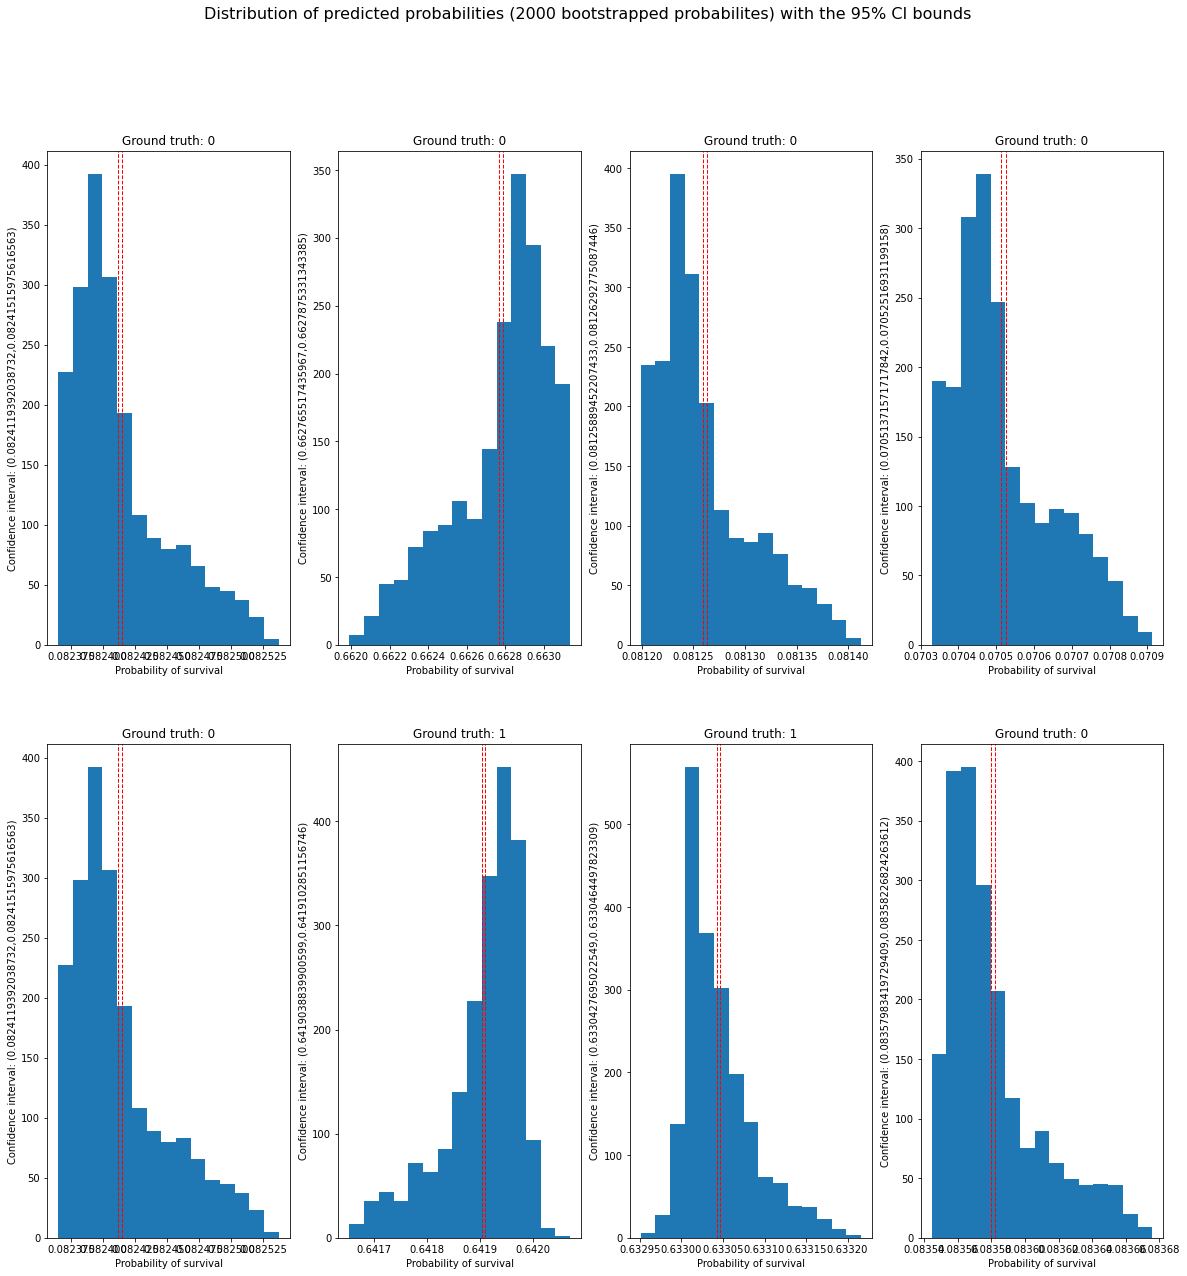

In [176]:
fig,axes=plt.subplots(2,4,figsize=(20,20))
fig.suptitle('Distribution of predicted probabilities (2000 bootstrapped probabilites) with the 95% CI bounds',fontsize=16)
num = 8
for ax in axes.ravel():
    interval=confidence_interval(histogram[num])
    ax.hist(histogram[num],bins=15)
    ax.set_xlabel('Probability of survival')
    ax.set_title(f'Ground truth: {y_test.iloc[num]}')
    ax.set_ylabel(f'Confidence interval: ({interval[0]},{interval[1]})')
    ax.axvline(interval[0],color='r',linestyle='dashed',linewidth=1)
    ax.axvline(interval[1],color='r',linestyle='dashed',linewidth=1)
    num+=1
plt.savefig('a.png')

## Interpretation :
Bootstrapping is a popular ensemble learning technique which improves generalization. From the confidence intervals of these observations, we can see that the predicted probabilities concur with the ground truth. Increasing the number of bootstraps will increase the confidence of the model's prediction.

In [169]:
thresh = 0.3
PPR=[]
soft_predictions=[]
for obs in histogram:
    if np.array(obs).mean()>thresh:
        soft_predictions.append(1)
    else:
        soft_predictions.append(0)

In [170]:
print(f'The test F1 score obtained from bootstrapping: {f1_score(y_test,soft_predictions)}') 

The test F1 score obtained from bootstrapping: 0.8041237113402062


In [171]:
def metric(hist, thresh, truth):
    soft_predictions = []
    for obs in histogram:
        if np.array(obs).mean()>thresh:
            soft_predictions.append(1)
        else:
            soft_predictions.append(0)
    return [precision_score(truth, soft_predictions), recall_score(truth, soft_predictions), f1_score(truth, soft_predictions)]

In [172]:
threshold = [i/10 for i in range(1, 10)]
precision = []
recall = []
f1 = []
for thresh in threshold:
    a, b, c = metric(histogram, thresh, y_test)
    precision.append(a)
    recall.append(b)
    f1.append(c)

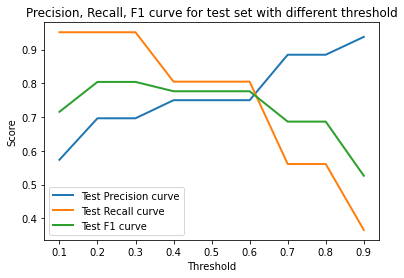

In [174]:
plt.plot(threshold, precision, linewidth=2, label='Test Precision curve')
plt.plot(threshold, recall, linewidth=2, label='Test Recall curve')
plt.plot(threshold, f1, linewidth=2, label='Test F1 curve')
#plt.plot([0,1],[0,1],'--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 curve for test set with different threshold')
plt.legend()
plt.savefig('a.png')

## Predicting on the test set using Model 2

In [288]:
test = pd.read_csv('test.csv')

In [290]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [292]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [311]:
test = test[['Pclass', 'Age', 'Sex']]

In [313]:
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

C:\Users\Vishal rishi M K\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [314]:
median_age = test['Age'].median()
test['Age'].fillna(median_age, inplace = True)

C:\Users\Vishal rishi M K\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [315]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   Sex     418 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [317]:
test_predictions = log.predict(test)